 ### <font color='yellow'>**1- Importing the required libraries**</font> 

In [27]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

---

###  <font color='yellow'>**2- Reading , preprocessing and visualizing the data**</font> 
- **Loading the raw data in a form of DataFrame**

In [41]:
import os
import pandas as pd

# Change the working directory
os.chdir('C:/Users/user/assign_dir/Prediction_Of_Heart_Failure')

# Verify the change
print("Updated Working Directory:", os.getcwd())

# Load the dataset
heart_data = pd.read_csv('data/raw/heart.csv')
heart_data




Updated Working Directory: C:\Users\user\assign_dir\Prediction_Of_Heart_Failure


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


---

- **Displaying dataset's information**

In [47]:
# display dataset's information
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


  - Dataset consists of 918 observations(rows)
   - There are 7 numeric columns distributed across 6 features and the target variable (1 float64 and 6 int64). 
     Also, there are 5 categorical features (object type).
   - There are no missing values

---

- **Statistical summary of heart disease dataset**

In [72]:
df_summary = heart_data.describe()
df_summary  

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- **Converting the Statistical summary into SQL database**

In [74]:
# reset the index
df_summary.reset_index()
# change the name of index to Statistics
df_statistics_summary = df_summary.reset_index().rename(columns ={'index':'Statistics'})
db_file = 'data/SQL/Heart_failure_Statistics_summary.db'
table_name = 'Heart_Failure_Statistics_summary'
# Connecting to SQLite database 
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Creating SQL table with the same columns as the DataFrame
df_statistics_summary.to_sql(table_name, conn, if_exists='replace', index=False)

print(f"The data has been successfully imported into '{table_name}' table.")

# Closing the connection
conn.close()

The data has been successfully imported into 'Heart_Failure_Statistics_summary' table.


---

- **Converting the CSV dataset into SQL database and saving it into SQL/data subfolrder**

In [75]:
# converting the data in CSV  into SQL database
db_file = 'data/SQL/Heart_failure_complete_raw_data.db'
table_name = 'Heart_Failure_Data'

# Connecting to SQLite database 
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Creating SQL table with the same columns as the DataFrame
heart_data.to_sql(table_name, conn, if_exists='replace', index=False)

print(f"The  data has been successfully imported into '{table_name}' table.")

# Closing the connection
conn.close()


The  data has been successfully imported into 'Heart_Failure_Data' table.


---

- **Identifying missing data and counting them if any**

In [46]:
heart_data.isna().sum()# We can also use this function to check for null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

---

- **Identifying Target variable, numerical and categorical features**

 **(I) - Target variable (HeartDisease)**

In [48]:
Y = heart_data['HeartDisease']
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

 - **Visualizing the categories (0 = No heart disease, 1 = Heart disease) of target variable**

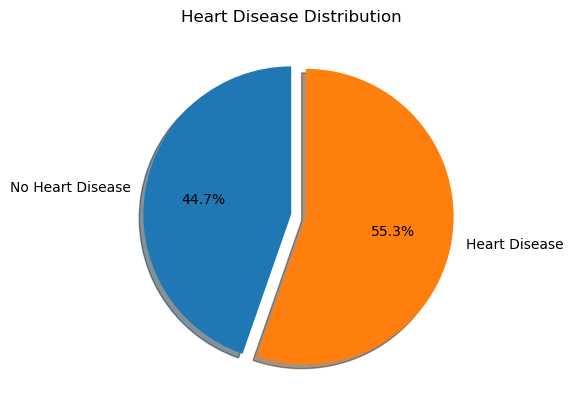

In [56]:
counts = heart_data['HeartDisease'].value_counts()
labels = 'No Heart Disease', 'Heart Disease'
sizes = [counts[0], counts[1]]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
# Add a title
plt.title("Heart Disease Distribution")
# Save the figure
plt.savefig("reports/visualizations/heart_disease_distribution.png")
plt.show()

The pie chart represents the distribution of heart disease and no heart disease cases in the dataset. It shows shows that approximately 55.3% of the cases in the dataset have heart disease, while 44.7% do not. Also, it can be concluded that the data is somewaht unbalanced; therefore, stratified sampling must be used for train/test spplitting.

---

**(II) - Numerical features**

The dataset contains numerical and categorical features, hence the next step is to indentify the numerical features, then converting them to SQL database

In [76]:
# Identify numeric features amd exclude the binary 'FastingBS' feature.
numeric_X = heart_data.iloc[:,:-1].select_dtypes(include=['float', 'int']).drop(columns='FastingBS')
numeric_X = list(numeric_X)
numeric_X

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

- **Converting numeric_features' data into SQL database**

In [77]:
db_file = 'data/SQL/Heart_failure_numeric_features.db'
table_name = 'Heart_Failure_numeric_features'
df_numeric_X = heart_data[numeric_X]
# Connecting to SQLite database 
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Creating SQL table with the same columns as the DataFrame
df_numeric_X.to_sql(table_name, conn, if_exists='replace', index=False)

print(f"The data has been successfully imported into '{table_name}' table.")

# Closing the connection
conn.close()

The data has been successfully imported into 'Heart_Failure_numeric_features' table.


 - **Visualizing the Numerical features**

**(a) - The distribution of numerical features**


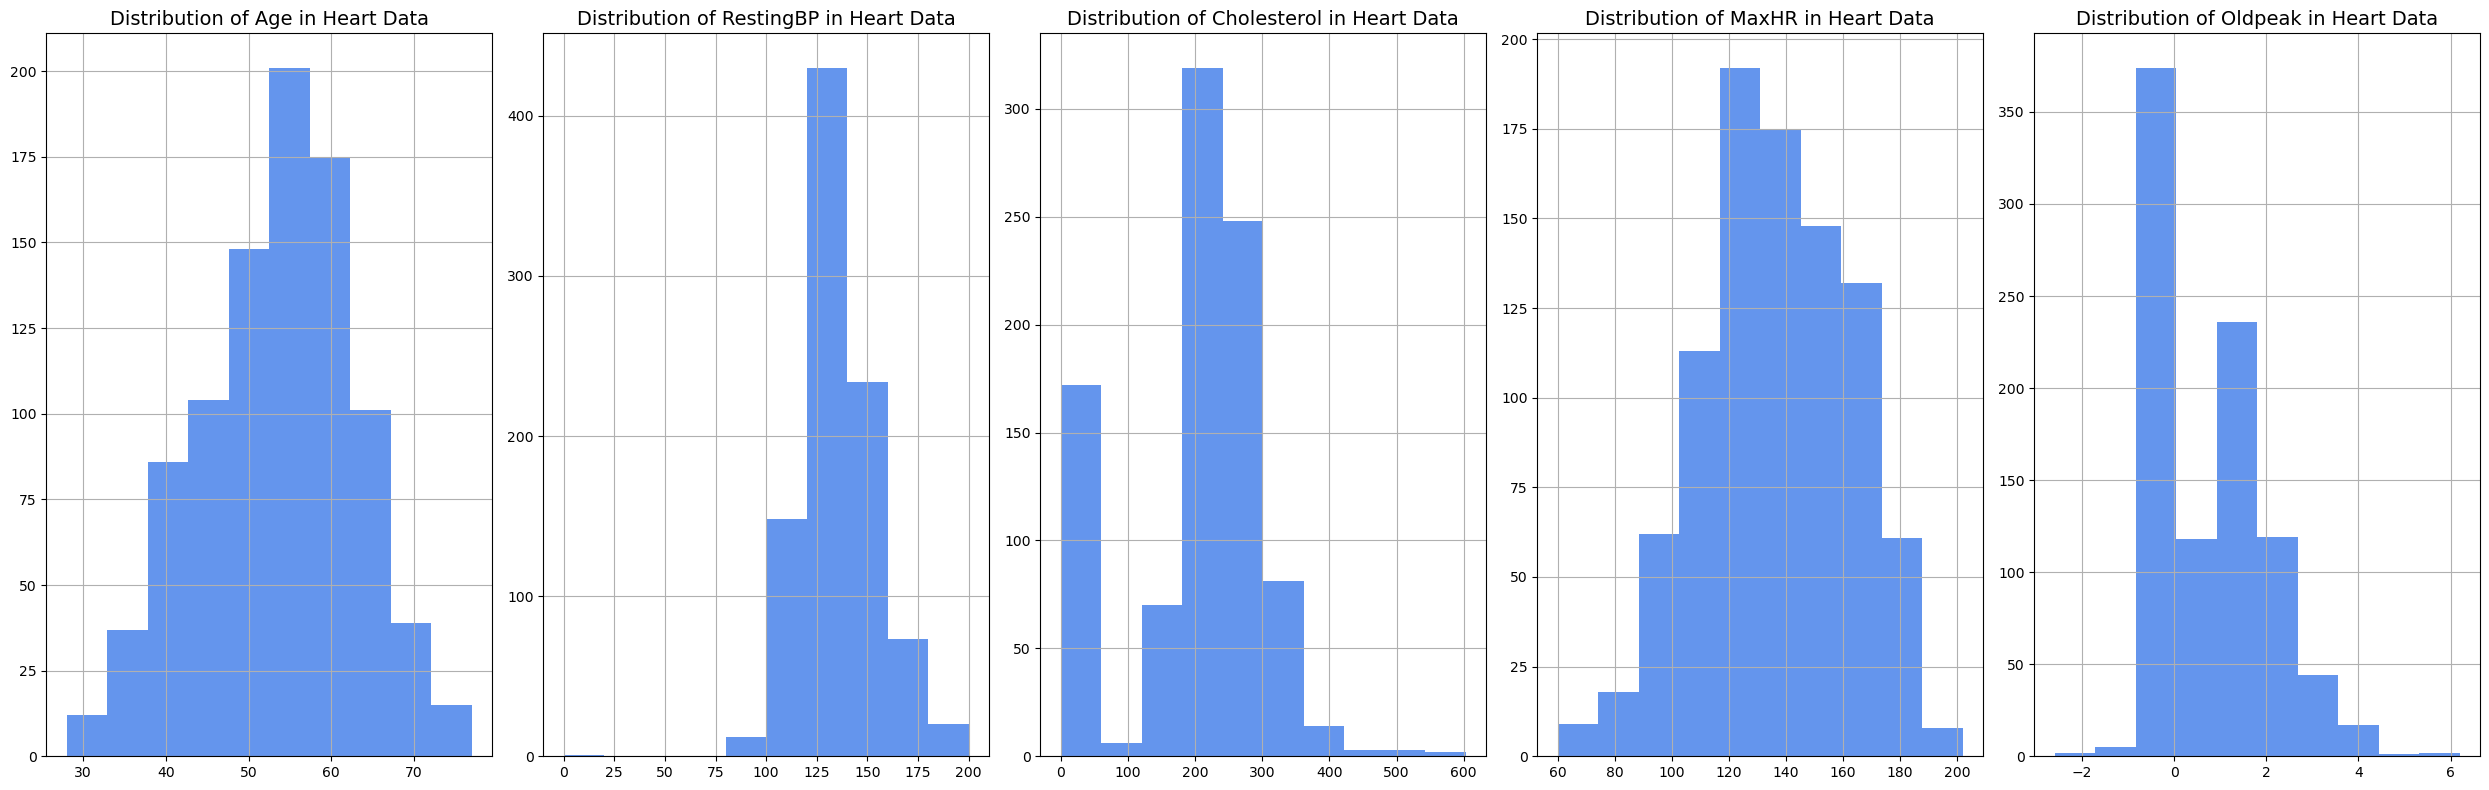

In [63]:
# Create subplots (1x5 for 5 features, adjust for your case)
fig, axes = plt.subplots(1, 5, figsize=(25, 8))  
axes = axes.flatten()  # Flatten axes for iteration

for i, feature in enumerate(numeric_X):
    heart_data.hist(feature, ax=axes[i], color='cornflowerblue')
    axes[i].set_title(f'Distribution of {feature} in Heart Data', fontsize=14)
# save the figure    
plt.savefig('reports/visualizations/distribution of numerical features in the dataset.png', dpi=300, bbox_inches='tight')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

1. **Age Distribution**: The distribution seems approximately **normal**, with a peak around the **50-60 year range**. There’s a noticible decrease in number for younger and older persons.

2. **RestingBP (Resting Blood Pressure)**: This distribution is **right-skewed** with most values between **120-150**. Some values above **150 mmHg** suggesting cases with high blood pressure.

3. **Cholesterol Levels**: The distribution is also looks **right-skewed**, with a majority of the values below **300 mg/dL**.   

4. **MaxHR (Maximum Heart Rate)**: The distribution is **bell-shaped** with maximum values between **120-140** bpm.
   - This suggests the data might follow physiological patterns, with most individuals achieving a similar range during maximal exertion.

5. **Oldpeak (ST Depression Induced by Exercise)**: The distribution is  **right-skewed** with most values near **0*

**(b) - Distribution of numerical features with respect to the target variable (HeartDisease) categories**

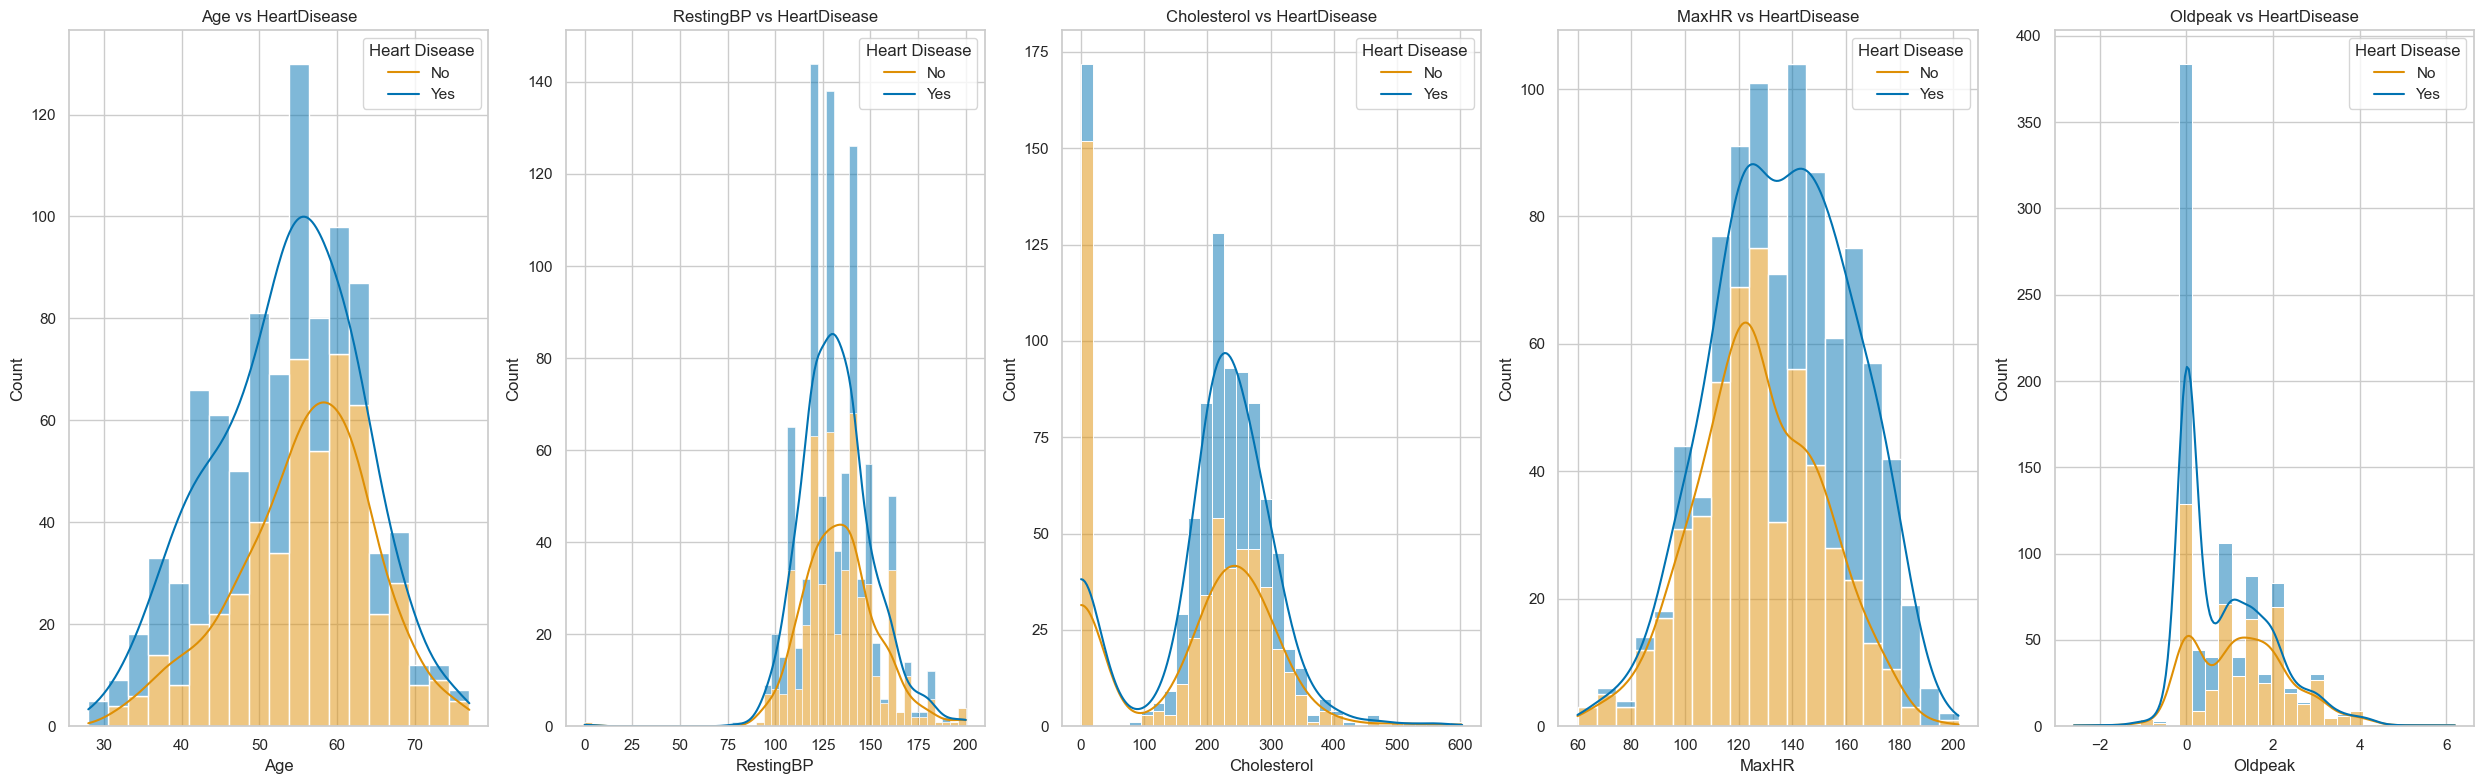

In [79]:
# List of numeric features to plot
df =heart_data
# Set plot style
sns.set_theme(style="whitegrid")

# Create multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 8))
axes = axes.flatten()



# Plot each feature as a histogram with a KDE
for i, col in enumerate(numeric_X):
    sns.histplot(data=df, x=col, hue='HeartDisease', multiple='stack', ax=axes[i], kde=True, palette='colorblind')
    axes[i].set_title(f'{col} vs HeartDisease')
    axes[i].legend(title='Heart Disease', labels=['No', 'Yes'])

# Save as PNG with high resolution
plt.savefig('reports/heart_disease_numeric_features_analysis.png', dpi=300, bbox_inches='tight')
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


 - The above figures show Kernel Density Estimation (KDE) plots overlaid on histograms of numerical features vs the categorical label (Heart Disease prediction). Each plot shows the distribution of a numerical faeture with respect to the Heart Disease (Yes/No). The following analysis discusses the potential of the numerical features in heart disease prediction using classification algorithm (KNN Classifier).

- In the **Age vs Heart Disease diagram** , it is clear that heart disease is more dominant between the ages of 50, 60. Also, there is an overlap between the two classes around the same range, and this suggests that this range is critical for heart disease prediction.

- In the **RestingBP vs Heart Disease daigram**, the two distribtions are centerd with an overlaparound almost the same range (120–140 mmHg), hence this range is also crtical in prediction of the heart disease though slightly higher BP values are associated with heart disease.

- In the **Cholesterol vs Heart Disease diagram** , persdons without heart disease tend to have lower levels of cholesterol , with a significant concentration around 150 mg/dL. However. High levels of cholesterol is usually associated with  higher risk of heart disease, but here there is a non-trivial number of people with high cholesterol and no heart disease.

- In **MaxHR vs Heart Disease diagram**, there are individuals with heart disease who have lower maximum heart rates, mostly concentrated below 140 bpm, but  there is others  without heart disease  who show higher max heart rates (above 140 bpm). MaxHR can be a good indicator of heart disease risk, as higher heart rates are associated with healthy individuals.

- In the **Oldpeak vs Heart Diseas diagrame**, Oldpeak (exercise-induced ST depression) is more elevated in people with heart disease, with the distribution maximum around 1 and 2. A higher Oldpeak value may indicate abnormal exercise response, which correlates with heart disease. Although lower or zero oldpeak values indicate normal, ther is considerable number of individuals with heart disese having almost zero Oldpeak.

---

**(III) - Categorical features**